In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_co2 = pd.read_csv('D:\\IBM_PROJECT\\Climate_Actions_AI\\data\\raw\\co2_emission.csv')


In [3]:
print("Initial Data:\n", df_co2.head())

Initial Data:
         Entity Code  Year  Annual CO₂ emissions (tonnes )
0  Afghanistan  AFG  1949                         14656.0
1  Afghanistan  AFG  1950                         84272.0
2  Afghanistan  AFG  1951                         91600.0
3  Afghanistan  AFG  1952                         91600.0
4  Afghanistan  AFG  1953                        106256.0


In [4]:
print("\nShape of the dataset:", df_co2.shape)


Shape of the dataset: (20853, 4)


In [5]:
print("\nColumns:\n", df_co2.columns.tolist())


Columns:
 ['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )']


In [6]:
print("\nMissing values:\n", df_co2.isnull().sum())


Missing values:
 Entity                               0
Code                              2207
Year                                 0
Annual CO₂ emissions (tonnes )       0
dtype: int64


In [7]:
print("\nData types:\n", df_co2.dtypes)


Data types:
 Entity                             object
Code                               object
Year                                int64
Annual CO₂ emissions (tonnes )    float64
dtype: object


In [8]:
print("\nSample rows:\n", df_co2.head())


Sample rows:
         Entity Code  Year  Annual CO₂ emissions (tonnes )
0  Afghanistan  AFG  1949                         14656.0
1  Afghanistan  AFG  1950                         84272.0
2  Afghanistan  AFG  1951                         91600.0
3  Afghanistan  AFG  1952                         91600.0
4  Afghanistan  AFG  1953                        106256.0


In [9]:
df_co2.rename(columns={
    'Entity': 'Country',
    'Code': 'Country Code',
    'Annual CO₂ emissions (tonnes )': 'Annual CO2 Emissions (tonnes)'
}, inplace=True)

In [10]:
df_co2.dropna(inplace=True)

In [15]:
year_columns = [col for col in df_co2.columns if col.isdigit()]

In [18]:
print(df_co2.columns.tolist())


['Country', 'Country Code', 'Year', 'Annual CO2 Emissions (tonnes)']


In [19]:
# Top emitting countries
top_emitters = df_co2.groupby('Country')['Annual CO2 Emissions (tonnes)'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 emitting countries (total emissions):\n", top_emitters)



Top 10 emitting countries (total emissions):
 Country
World             1.575244e+12
United States     3.993783e+11
China             2.001365e+11
Russia            1.005891e+11
Germany           9.056563e+10
United Kingdom    7.707106e+10
Japan             6.230461e+10
India             4.855786e+10
France            3.776808e+10
Canada            3.191352e+10
Name: Annual CO2 Emissions (tonnes), dtype: float64


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_26260\4061567369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values / 1e9, y=top_emitters.index, palette='Reds_r')


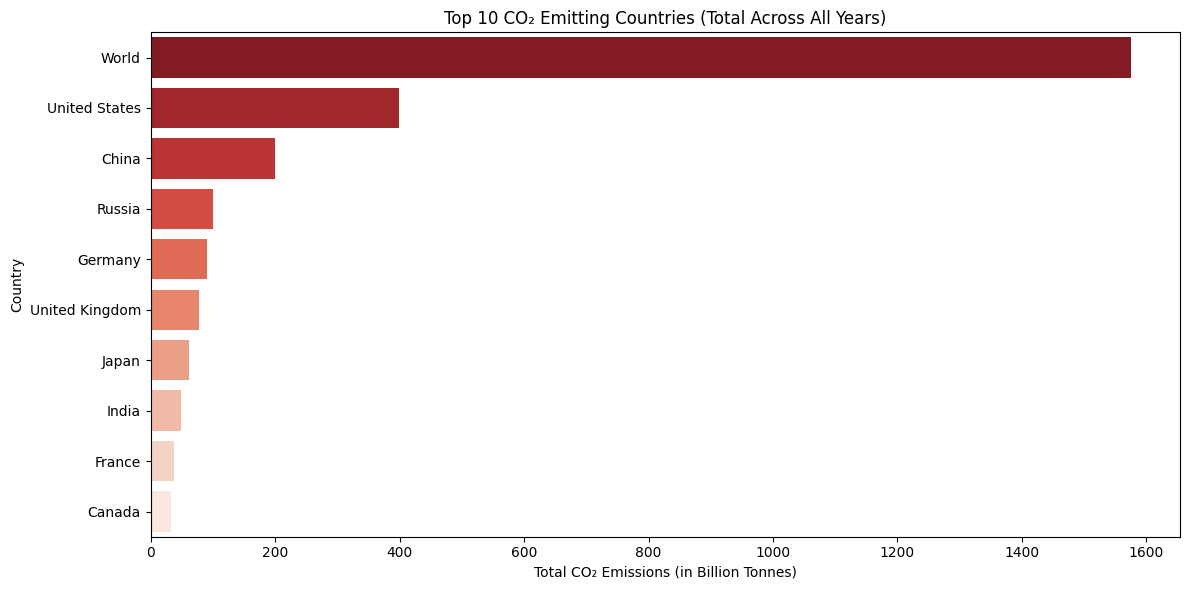

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_emitters.values / 1e9, y=top_emitters.index, palette='Reds_r')
plt.xlabel("Total CO₂ Emissions (in Billion Tonnes)")
plt.title("Top 10 CO₂ Emitting Countries (Total Across All Years)")
plt.tight_layout()
plt.show()


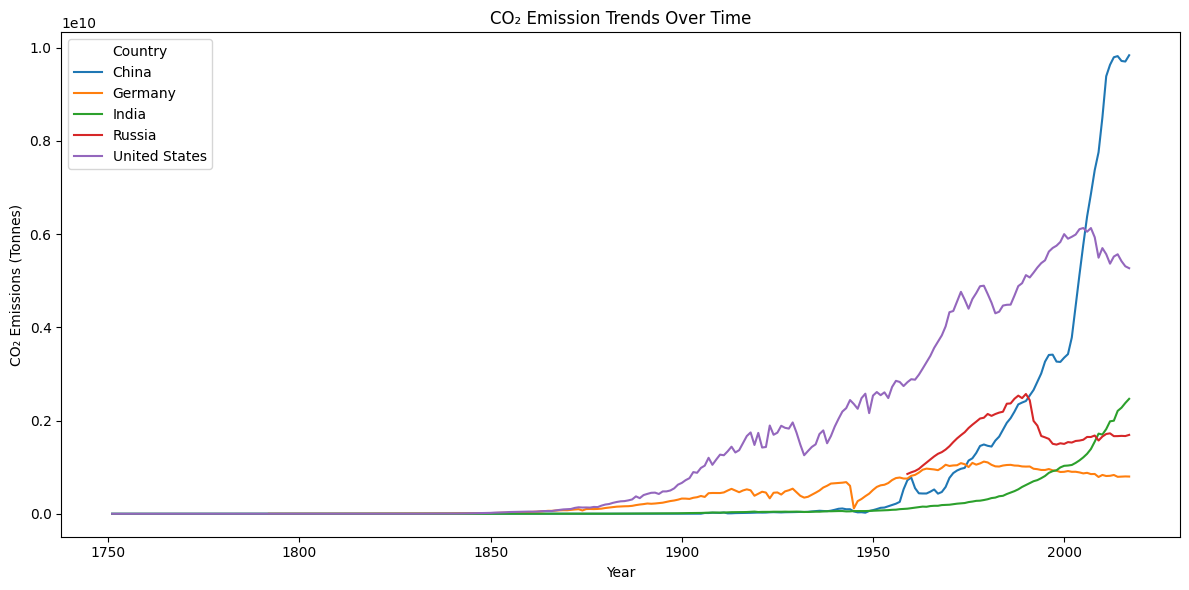

In [21]:
# Convert Year to integer if needed
df_co2['Year'] = df_co2['Year'].astype(int)

# Filter for countries of interest
countries_to_plot = ['India', 'United States', 'China', 'Russia', 'Germany']
df_selected = df_co2[df_co2['Country'].isin(countries_to_plot)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Annual CO2 Emissions (tonnes)', hue='Country')
plt.ylabel("CO₂ Emissions (Tonnes)")
plt.title("CO₂ Emission Trends Over Time")
plt.tight_layout()
plt.show()


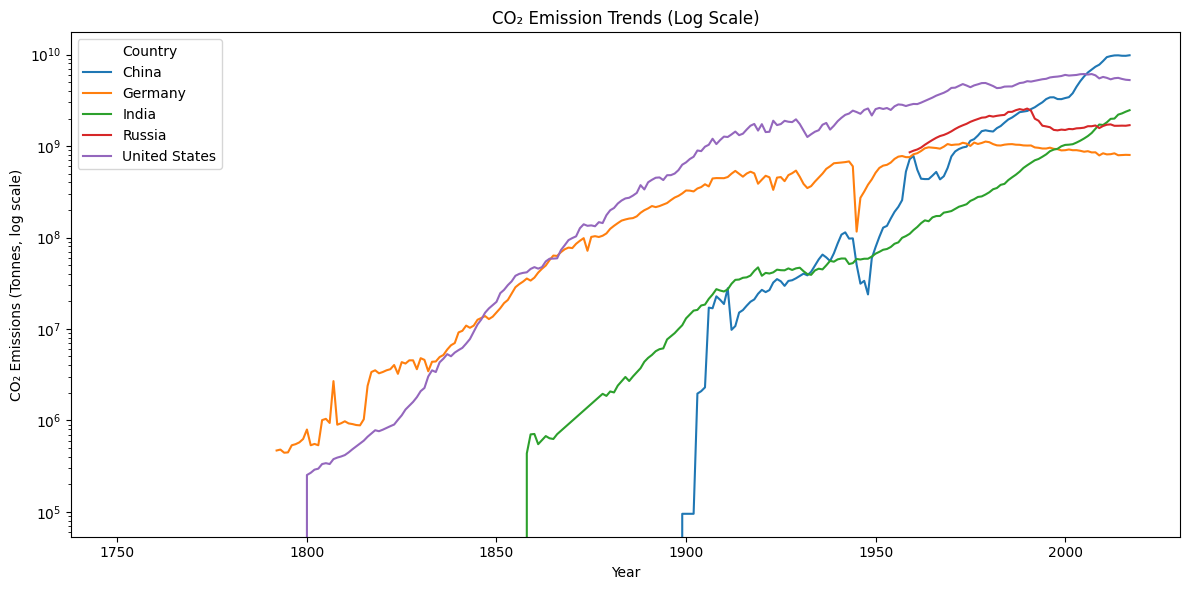

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Year', y='Annual CO2 Emissions (tonnes)', hue='Country')
plt.yscale('log')  # Apply log scale for better visibility
plt.ylabel("CO₂ Emissions (Tonnes, log scale)")
plt.title("CO₂ Emission Trends (Log Scale)")
plt.tight_layout()
plt.show()


In [23]:
print(df_co2.columns)



Index(['Country', 'Country Code', 'Year', 'Annual CO2 Emissions (tonnes)'], dtype='object')


In [27]:
print(df_co2.head())
print(df_co2.columns)
print(df_co2.dtypes)


       Country Country Code  Year  Annual CO2 Emissions (tonnes)
0  Afghanistan          AFG  1949                        14656.0
1  Afghanistan          AFG  1950                        84272.0
2  Afghanistan          AFG  1951                        91600.0
3  Afghanistan          AFG  1952                        91600.0
4  Afghanistan          AFG  1953                       106256.0
Index(['Country', 'Country Code', 'Year', 'Annual CO2 Emissions (tonnes)'], dtype='object')
Country                           object
Country Code                      object
Year                               int64
Annual CO2 Emissions (tonnes)    float64
dtype: object


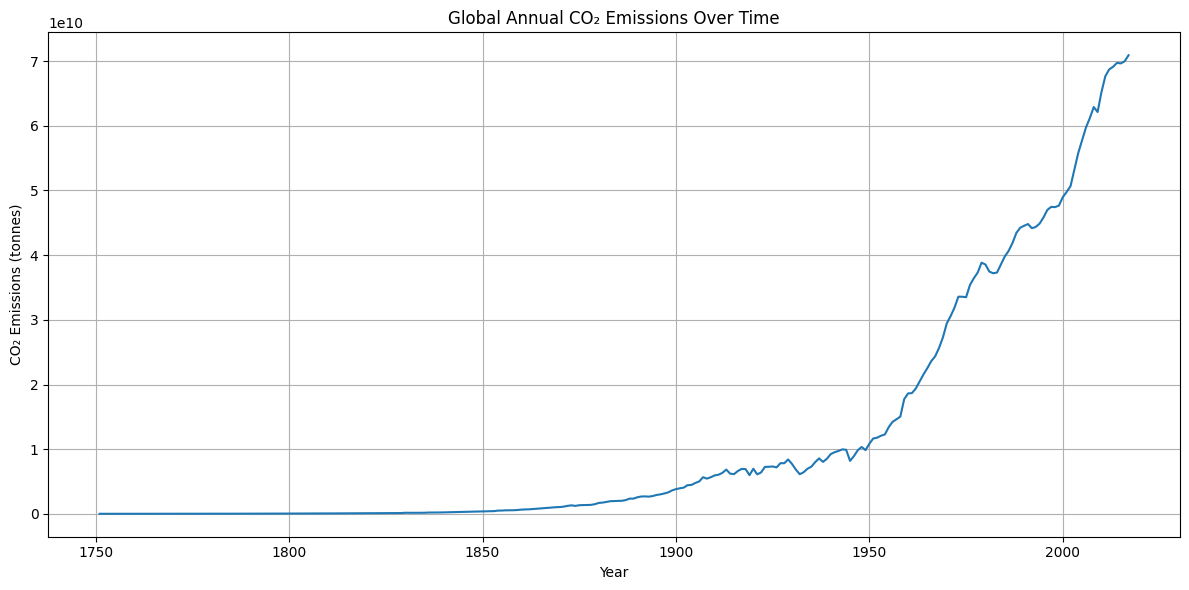

In [28]:
# Convert 'Year' to integer
df_co2['Year'] = df_co2['Year'].astype(int)

# Group by Year to get total global emissions
global_emissions = df_co2.groupby('Year')['Annual CO2 Emissions (tonnes)'].sum().reset_index()

# Plot global trend
plt.figure(figsize=(12,6))
sns.lineplot(data=global_emissions, x='Year', y='Annual CO2 Emissions (tonnes)')
plt.title('Global Annual CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Prerana V\AppData\Local\Temp\ipykernel_26260\2899591896.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emitters, x='Annual CO2 Emissions (tonnes)', y='Country', palette='Reds_r')


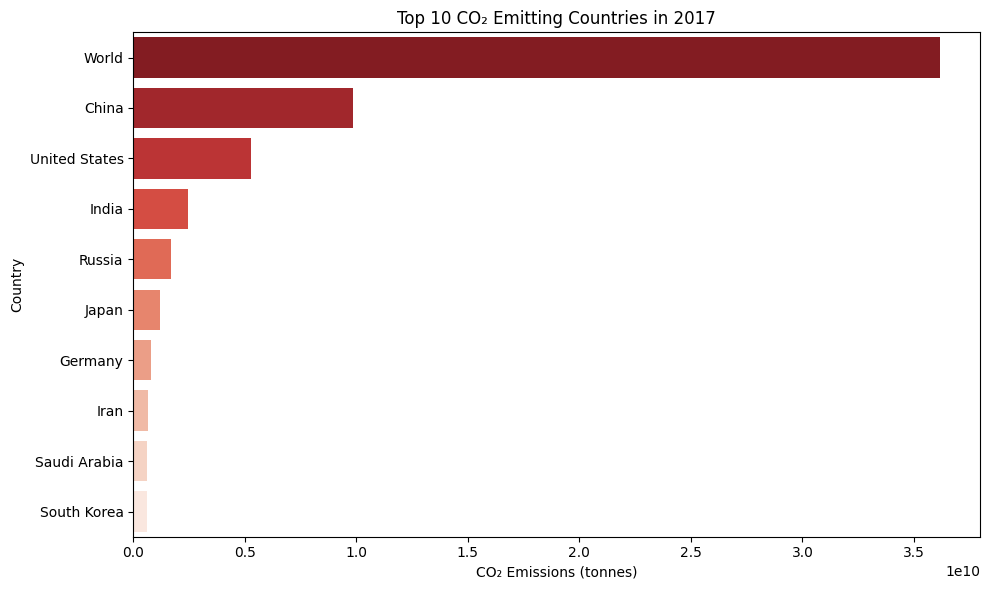

In [29]:
latest_year = df_co2['Year'].max()
top_emitters = df_co2[df_co2['Year'] == latest_year].sort_values(
    'Annual CO2 Emissions (tonnes)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_emitters, x='Annual CO2 Emissions (tonnes)', y='Country', palette='Reds_r')
plt.title(f'Top 10 CO₂ Emitting Countries in {latest_year}')
plt.xlabel('CO₂ Emissions (tonnes)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [30]:
# Only keep columns we need
df_model = df_co2[['Country', 'Year', 'Annual CO2 Emissions (tonnes)']]

# Pivot data to wide format: one row per country, columns for each year
df_wide = df_model.pivot(index='Country', columns='Year', values='Annual CO2 Emissions (tonnes)')

# Fill missing values using forward-fill (optional: try other methods too)
df_wide = df_wide.fillna(method='ffill', axis=1).fillna(0)

# Check shape
print(df_wide.shape)
print(df_wide.head())


(222, 267)
Year         1751  1752  1753  1754  1755  1756  1757  1758  1759  1760  ...  \
Country                                                                  ...   
Afghanistan   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Albania       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Algeria       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Andorra       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Angola        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

Year                 2008          2009          2010          2011  \
Country                                                               
Afghanistan  4.198330e+06  6.760313e+06  8.452224e+06  1.222602e+07   
Albania      4.371152e+06  4.374816e+06  4.594656e+06  5.235856e+06   
Algeria      1.090318e+08  1.201859e+08  1.178141e+08  1.198069e+08   
Andorra      5.386080e+05  5.166240e+05  5.166240e+05  4.909760e+05   
An

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_26260\916134525.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_wide = df_wide.fillna(method='ffill', axis=1).fillna(0)


In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example: Predict Afghanistan's emissions for 2025
country_data = df_wide.loc['Afghanistan'].dropna()

# Prepare X and y
X = np.array(country_data.index).reshape(-1, 1)
y = np.array(country_data.values).reshape(-1, 1)

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict 2025
year_to_predict = np.array([[2025]])
predicted_emission = model.predict(year_to_predict)

print(f"Predicted CO₂ emissions for Afghanistan in 2025: {predicted_emission[0][0]:,.2f} tonnes")


Predicted CO₂ emissions for Afghanistan in 2025: 2,505,135.08 tonnes


In [32]:
# Convert 'Year' to integer type if it's not already
df_co2['Year'] = df_co2['Year'].astype(int)

# Confirm data format
print(df_co2.head())


       Country Country Code  Year  Annual CO2 Emissions (tonnes)
0  Afghanistan          AFG  1949                        14656.0
1  Afghanistan          AFG  1950                        84272.0
2  Afghanistan          AFG  1951                        91600.0
3  Afghanistan          AFG  1952                        91600.0
4  Afghanistan          AFG  1953                       106256.0


In [33]:
# Group by country
countries = df_co2['Country'].unique()

# Example: Train for all countries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

models = {}
errors = {}

for country in countries:
    country_data = df_co2[df_co2['Country'] == country]
    
    if len(country_data) < 10:
        continue  # Skip countries with too few data points
    
    X = country_data[['Year']]
    y = country_data['Annual CO2 Emissions (tonnes)']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict and calculate error
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    
    models[country] = model
    errors[country] = mse


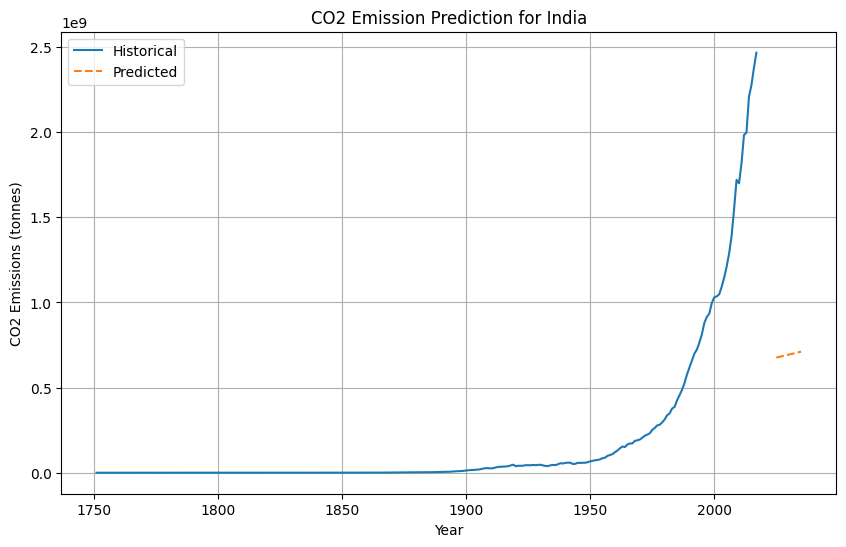

In [34]:
future_years = pd.DataFrame({'Year': list(range(2025, 2036))})

# Predict for a sample country
sample_country = 'India'
if sample_country in models:
    model = models[sample_country]
    predictions = model.predict(future_years)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(df_co2[df_co2['Country'] == sample_country]['Year'], 
             df_co2[df_co2['Country'] == sample_country]['Annual CO2 Emissions (tonnes)'], label="Historical")
    plt.plot(future_years['Year'], predictions, label="Predicted", linestyle='--')
    plt.title(f"CO2 Emission Prediction for {sample_country}")
    plt.xlabel("Year")
    plt.ylabel("CO2 Emissions (tonnes)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [37]:
# Rename columns
df_co2.rename(columns={
    'Entity': 'Country',
    'Code': 'Country Code',
    'Annual CO₂ emissions (tonnes )': 'Annual CO2 Emissions (tonnes)'
}, inplace=True)

# Drop missing values
df_co2.dropna(inplace=True)

# Ensure correct data types
df_co2['Year'] = df_co2['Year'].astype(int)
df_co2['Annual CO2 Emissions (tonnes)'] = df_co2['Annual CO2 Emissions (tonnes)'].astype(float)

# Preview cleaned dataset
print(df_co2.info())
print(df_co2.head())

# Save cleaned dataset
cleaned_path = '/mnt/data/cleaned_co2_emissions.csv'
# Save to the current working directory
df_co2.to_csv('cleaned_co2_emissions.csv', index=False)


# Display path for download
cleaned_path


<class 'pandas.core.frame.DataFrame'>
Index: 18646 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        18646 non-null  object 
 1   Country Code                   18646 non-null  object 
 2   Year                           18646 non-null  int64  
 3   Annual CO2 Emissions (tonnes)  18646 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 728.4+ KB
None
       Country Country Code  Year  Annual CO2 Emissions (tonnes)
0  Afghanistan          AFG  1949                        14656.0
1  Afghanistan          AFG  1950                        84272.0
2  Afghanistan          AFG  1951                        91600.0
3  Afghanistan          AFG  1952                        91600.0
4  Afghanistan          AFG  1953                       106256.0


'/mnt/data/cleaned_co2_emissions.csv'